## Observations and Insights 

###### The Ratio of male vs female mice is almost similar
###### Similar number of tests were done on the mouse for each drug regimen
###### One outlier was found for drug Infubinol 
###### Except Campomulin and Ramicane the average tumor volumne per drug  is simliar.
###### Campomulin regimne scatter plot is a postive liner regression

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_results = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
mouse_study_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count = mouse_study_results["Mouse ID"].nunique()
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_Id = mouse_study_results[mouse_study_results.duplicated()]
duplicate_mice_Id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_Id_Data = mouse_study_results.loc[mouse_study_results["Mouse ID"] == "g989"]
duplicate_mice_Id_Data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_results_clean = mouse_study_results.loc[mouse_study_results["Mouse ID"] != "g989"]
mouse_study_results_clean.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = mouse_study_results_clean["Mouse ID"]
mice_count_clean.nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
Drug_Regimen = mouse_study_results_clean.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = Drug_Regimen['Tumor Volume (mm3)'].mean()
median = Drug_Regimen['Tumor Volume (mm3)'].median()
variance = Drug_Regimen['Tumor Volume (mm3)'].var()
standard_dev = Drug_Regimen['Tumor Volume (mm3)'].std()
sem = Drug_Regimen['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean": mean,"Median":median,"Variance": variance,"Standard Deviation":standard_dev,"Sem":sem})
summary_df


,Mean,Median,Variance,Standard Deviation,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_df = mouse_study_results_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
aggregate_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

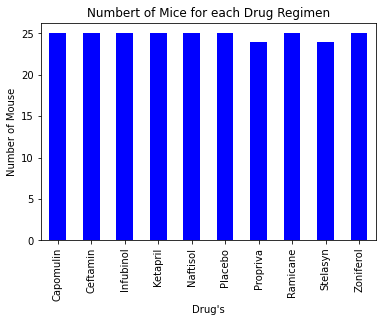

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
Drug_df = mouse_study_results_clean.groupby(["Drug Regimen"])["Mouse ID"].nunique()
Drug_df.plot(kind = "bar",facecolor="blue")
#set a title and labels
plt.title("Numbert of Mice for each Drug Regimen")
plt.xlabel("Drug's")
plt.ylabel("Number of Mouse")
#Save and show graph
plt.savefig("../Images/pandas_bar.png")
plt.show()

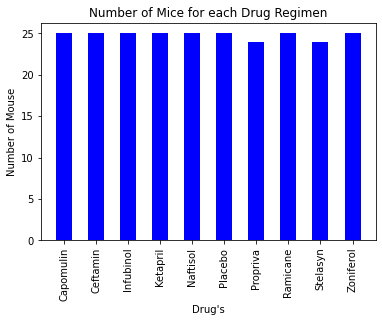

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(Drug_df))
tick_locations = [x for x in x_axis]
plt.bar(Drug_df.index, Drug_df, facecolor="blue",align="center",width=0.5)
plt.xticks(tick_locations, Drug_df.index, rotation="vertical")
#set a title and labels
plt.title("Number of Mice for each Drug Regimen")
plt.xlabel("Drug's")
plt.ylabel("Number of Mouse")
#Save and show graph
plt.savefig("../Images/pyplot_bar.png")
plt.show()

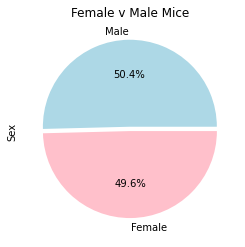

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_df = mouse_study_results_clean[["Mouse ID", "Sex"]].drop_duplicates()
mouse_gender = mouse_df["Sex"].value_counts()
mouse_gender.plot(kind="pie", title="Female v Male Mice", autopct="%1.1f%%",\
               colors = ("lightblue", "pink"), explode=(0.05, 0))
plt.savefig("../Images/pandas_pie.png")
plt.show()

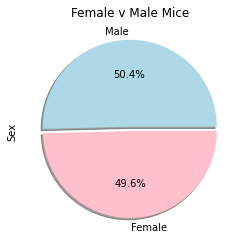

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["lightblue", "pink"]
explode = (0.05, 0)
labels = mouse_gender.index
plt.pie(mouse_gender, labels = labels ,colors = colors,autopct = "%1.1f%%", shadow=True, explode=explode)
plt.title("Female v Male Mice")
plt.ylabel("Sex")
plt.savefig("../Images/pyplot_pie.png")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_volume = mouse_study_results_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sum()
#print(final_tumor_volume)

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = mouse_study_results_clean.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Merge_df = pd.merge(mouse_study_results_clean, max_timepoint, how="inner", on=["Mouse ID", "Timepoint"])
Merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatment_list:
    tumor_volume_df = Merge_df.loc[Merge_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_volume_df)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = tumor_volume_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
# add subset   
# Determine outliers using upper and lower bounds
outliers =   tumor_volume_df.loc[(tumor_volume_df < lower_bound) | (tumor_volume_df > upper_bound)]

The lower quartile of tumor volume is: 48.72207785
The upper quartile of tumor volume is: 64.29983003
The interquartile range of tumor volume is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


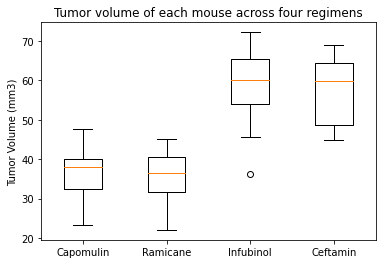

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor volume of each mouse across four regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data)
ax1.xaxis.set(ticks=range(1,len(treatment_list) + 1),ticklabels=treatment_list)
plt.savefig("../Images/boxplot.png")
plt.show()

## Line and Scatter Plots

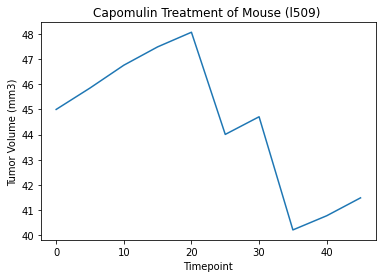

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
drug_capomulin = mouse_study_results_clean.loc[mouse_study_results_clean["Drug Regimen"]== "Capomulin"]
one_mouse = drug_capomulin.loc[drug_capomulin["Mouse ID"] == "l509"]

#x and Y axis
time_point = one_mouse["Timepoint"]
tumor_volume = one_mouse["Tumor Volume (mm3)"]

#Line Plot and label's
plt.plot(time_point,tumor_volume)
plt.title("Capomulin Treatment of Mouse (l509) ")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig("../Images/Lineplot.png")
plt.show()

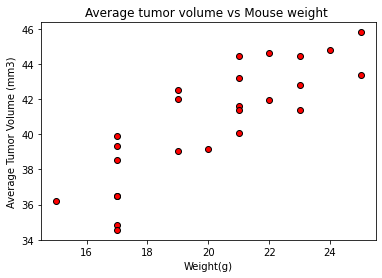

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#x and Y axis
average_tumor_volume = drug_capomulin.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
mouse_weight = drug_capomulin.groupby(["Mouse ID"])["Weight (g)"].mean()

#Scatter Plot and label's
plt.scatter(mouse_weight, average_tumor_volume,  marker="o", facecolors="red", edgecolors="black")
plt.title("Average tumor volume vs Mouse weight ")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.savefig("../Images/Scattereplot.png")
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


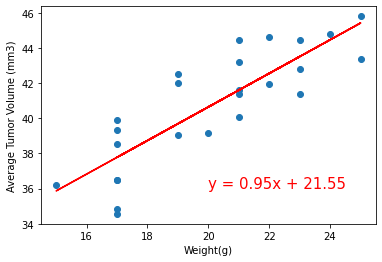

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#correlation
correlation = st.pearsonr(mouse_weight,average_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#Linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, average_tumor_volume)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Scatter plot and label's 
plt.scatter(mouse_weight,average_tumor_volume)
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.savefig("../Images/RegressionScattereplot.png")
plt.show()